In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram,linkage

import matplotlib.pyplot as plt

import pickle

In [2]:
df = pd.read_csv('datasets_117_1001_responses.csv')

In [3]:
pd.options.display.max_columns=None

In [4]:
df.head()

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.

In [5]:
survey_df = df.copy()

In [6]:
smoking = ['never smoked', 'tried smoking', 'former smoker', 'current smoker']


In [7]:
survey_df['Smoking'] = df.Smoking.astype('category',categories=smoking).cat.codes

C:\Users\obehi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
print(survey_df['Alcohol'].unique())
print(survey_df['Punctuality'].unique())
print(survey_df['Lying'].unique())
print(survey_df['Internet_usage'].unique())
print(survey_df['Gender'].unique())
print(survey_df['Left_right_handed'].unique())
print(survey_df['Education'].unique())
print(survey_df['Only_child'].unique())
print(survey_df['Village_town'].unique())
print(survey_df['House_block_of_flats'].unique())

['drink a lot' 'social drinker' 'never' nan]
['i am always on time' 'i am often early' 'i am often running late' nan]
['never' 'sometimes' 'only to avoid hurting someone'
 'everytime it suits me' nan]
['few hours a day' 'most of the day' 'less than an hour a day'
 'no time at all']
['female' 'male' nan]
['right handed' 'left handed' nan]
['college/bachelor degree' 'secondary school' 'primary school'
 'masters degree' 'doctorate degree' 'currently a primary school pupil'
 nan]
['no' 'yes' nan]
['village' 'city' nan]
['block of flats' 'house/bungalow' nan]


In [9]:
alcohol=['drink a lot', 'social drinker', 'never']
punctuality=['i am always on time' ,'i am often early', 'i am often running late']
lying=['never' ,'sometimes' ,'only to avoid hurting someone','everytime it suits me']
internet=['few hours a day' ,'most of the day' ,'less than an hour a day','no time at all']
gender=['female' ,'male']
left_right_handed=['right handed' ,'left handed']
education=['college/bachelor degree' ,'secondary school','primary school','masters degree' ,'doctorate degree' ,'currently a primary school pupil']
only_child=['no' ,'yes']
village_town=['village', 'city']
house_block_of_flats=['block of flats' ,'house/bungalow']

In [10]:
survey_df['Alcohol'] = df.Alcohol.astype('category',categories=alcohol).cat.codes
survey_df['Punctuality'] = df.Punctuality.astype('category',categories=punctuality).cat.codes
survey_df['Lying'] = df.Lying.astype('category',categories=lying).cat.codes
survey_df['Internet_usage'] = df.Internet_usage.astype('category',categories=internet).cat.codes
survey_df['Education'] = df.Education.astype('category',categories=education).cat.codes
survey_df['Gender'] = df.Gender.astype('category',categories=gender).cat.codes
survey_df['Left_right_handed'] = df.Left_right_handed.astype('category',categories=left_right_handed).cat.codes
survey_df['Only_child'] = df.Only_child.astype('category',categories=only_child).cat.codes
survey_df['Village_town'] = df.Village_town.astype('category',categories=village_town).cat.codes
survey_df['House_block_of_flats'] = df.House_block_of_flats.astype('category',categories=house_block_of_flats).cat.codes

In [11]:
survey_df.head()

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,0,0,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,0,0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,0,0,0,0,0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,0,0,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,1,1,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,0,0,0,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,1,0,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,2,1,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,0,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,0,0,1,0,1,0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,5.0,4.0,4.0,2.0,5.0,1.0,5.0,4.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,5.0,5,5.0,4.0,5.0,5.0,2,0,3.0,4.0,4.0,4.0,5.0,3.0,1.0,3.0,4.0,5.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,3.0,1,1.0,2.0,5.0,5.0,5.0,1.0,5.0,4.0,3,3.

In [12]:
clean_df = survey_df.copy()

In [13]:
clean_df = clean_df.dropna()

In [14]:
clean_df.to_csv (r'C:\Users\obehi\Desktop\Young people survey.csv',index = False, header = True )

In [15]:
Dance_music = clean_df.groupby(['Dance']).mean()

In [16]:
Dance_music.head()

,Music,Slow_songs_or_fast_songs,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
Dance,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,4.638889,3.208333,2.069444,1.986111,3.180556,2.333333,2.250000,3.888889,3.041667,2.569444,1.819444,2.236111,2.263889,3.027778,3.027778,1.916667,1.486111,2.305556,4.555556,2.638889,3.263889,4.236111,2.972222,2.972222,3.388889,3.666667,3.791667,3.750000,2.208333,3.305556,3.513889,3.125000,2.722222,2.125000,1.916667,4.027778,2.972222,2.263889,2.305556,1.819444,3.430556,3.208333,3.652778,2.250000,2.083333,2.083333,2.611111,2.180556,3.791667,1.791667,2.541667,2.083333,3.222222,2.652778,1.875000,1.722222,2.513889,3.013889,3.111111,4.194444,2.291667,3.152778,1.652778,1.652778,2.305556,2.500000,3.013889,2.819444,1.916667,2.236111,2.750000,2.791667,1.291667,0.958333,2.763889,2.902778,2.597222,2.861111,2.916667,3.541667,2.347222,3.777778,4.000000,2.750000,3.819444,3.097222,2.222222,2.666667,3.291667,3.277778,3.583333,3.930556,1.916667,3.694444,2.180556,2.500000,4.083333,4.055556,3.000000,3.583333,2.986111,2.763889,2.902778,3.263889,2.069444,3.083333,0.902778,1.472222,2.666667,3.430556,3.347222,3.319444,2.777778,2.958333,3.263889,3.402778,3.333333,3.111111,3.152778,3.500000,3.236111,2.861111,3.500000,3.180556,3.236111,3.097222,3.111111,3.666667,3.430556,3.138889,2.694444,0.347222,3.111111,2.625000,2.847222,3.180556,2.680556,2.638889,3.555556,19.944444,175.236111,66.222222,1.347222,0.430556,0.111111,1.055556,0.208333,0.750000,0.291667
2.0,4.712418,3.189542,2.209150,2.169935,3.183007,2.836601,3.000000,4.196078,2.771242,2.862745,2.411765,2.777778,2.973856,3.411765,3.294118,2.411765,1.771242,2.398693,4.568627,2.601307,3.307190,4.444444,3.274510,3.261438,3.235294,3.555556,3.562092,3.718954,2.124183,3.450980,3.320261,3.228758,2.777778,2.437908,2.098039,4.228758,3.261438,2.594771,2.490196,2.039216,3.457516,3.137255,3.862745,2.457516,2.326797,2.535948,2.777778,2.117647,3.509804,1.928105,2.372549,2.039216,3.294118,3.065359,1.823529,2.169935,2.973856,3.418301,2.973856,4.418301,2.790850,3.313725,2.006536,1.836601,2.169935,2.542484,2.503268,2.732026,2.026144,2.457516,2.88

In [17]:
Horror_movie = clean_df.groupby(['Horror']).mean()

In [18]:
Horror_movie.head()

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
Horror,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,4.775862,3.252874,2.977011,2.482759,2.120690,3.212644,2.942529,3.482759,3.856322,2.344828,2.431034,2.597701,2.706897,2.885057,3.126437,2.965517,3.022989,2.201149,2.316092,4.534483,2.603448,4.402299,3.574713,2.867816,2.856322,4.005747,3.885057,3.810345,1.994253,3.477011,3.229885,3.172414,2.522989,2.298851,2.011494,4.022989,2.712644,2.557471,2.816092,2.281609,3.574713,3.206897,3.890805,2.534483,2.103448,2.275862,2.752874,2.459770,3.781609,2.603448,2.356322,1.816092,3.201149,3.051724,2.086207,2.206897,3.293103,3.114943,3.252874,4.482759,2.517241,3.402299,2.097701,2.063218,2.339080,2.545977,2.925287,3.241379,2.339080,2.327586,3.109195,2.844828,1.086207,0.902299,2.988506,2.982759,2.563218,3.310345,3.017241,3.494253,2.528736,3.844828,3.971264,2.787356,3.873563,3.126437,2.040230,2.350575,3.356322,3.557471,3.827586,4.000000,1.850575,3.896552,1.936782,2.798851,3.873563,4.109195,2.867816,3.494253,3.160920,2.844828,3.494253,3.350575,2.057471,3.252874,0.896552,1.362069,2.649425,3.522989,3.327586,3.683908,2.965517,2.879310,3.241379,3.672414,3.534483,3.172414,3.333333,3.597701,3.505747,3.327586,3.775862,3.586207,2.873563,3.235632,3.011494,3.465517,3.471264,3.419540,2.770115,0.477011,3.137931,3.247126,2.890805,2.936782,3.011494,2.586207,3.545977,20.034483,172.206897,63.229885,1.321839,0.270115,0.080460,0.982759,0.264368,0.683908,0.454023
2.0,4.722222,3.173611,3.055556,2.208333,2.055556,2.902778,2.784722,3.423611,3.763889,2.180556,2.277778,2.812500,2.715278,2.756944,3.111111,2.777778,2.798611,2.229167,2.055556,4.541667,2.937500,4.465278,3.541667,3.013889,3.097222,3.645833,3.638889,3.555556,2.131944,3.416667,3.138889,3.145833,2.576389,2.451389,2.229167,4.215278,3.111111,2.611111,2.638889,2.159722,3.138889,3.166667,3.833333,2.631944,2.152778,2.534722,2.590278,2.284722,3.625000,2.458333,2.347222,1.895833,3.305556,3.305556,1.826389,2.423611,3.215278,3.277778,3.027778,4.548611,2.937500,3.111111,1.923611,1.993056,2.347222,2.666667,2.763889,2.965278,2.319444,2.666667,3.08

In [19]:
Target = clean_df['Adrenaline_sports']

In [20]:
clean_df = clean_df.drop(['Adrenaline_sports'], axis =1)

In [21]:
features = clean_df.copy()

In [22]:
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

In [23]:
hier_clust = linkage(features_std, method='ward')

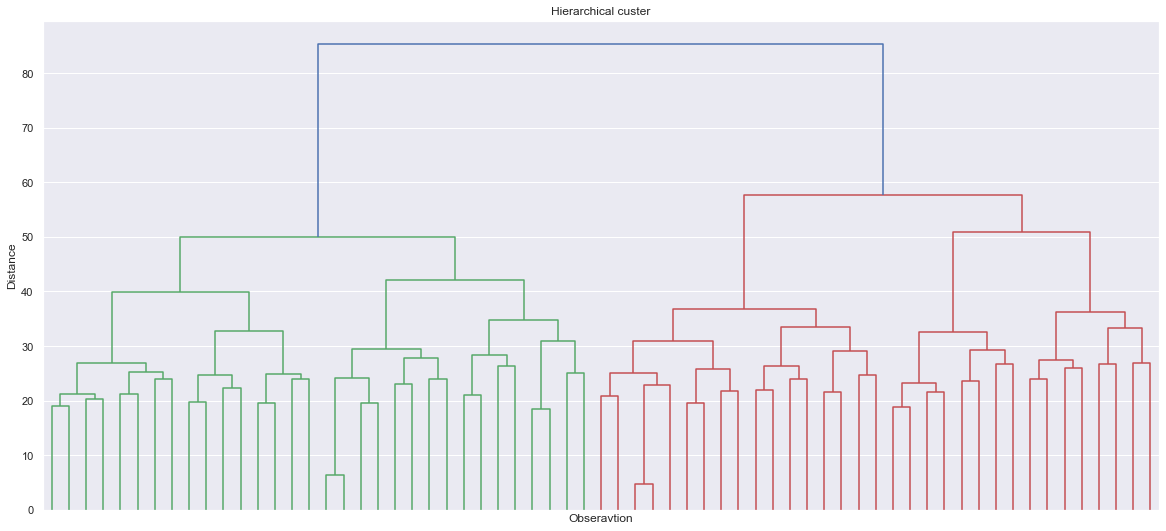

In [24]:
plt.figure(figsize=(20,9))
plt.title('Hierarchical custer')
plt.xlabel('Obseravtion')
plt.ylabel('Distance')
dendrogram(hier_clust,
          truncate_mode = 'level',
          p=5,
          show_leaf_counts = False,
          no_labels = True)
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

In [26]:
kmeans.fit(features_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [27]:
kmeans_segm_df = features.copy()

In [28]:
kmeans_segm_df['segment K-means'] = kmeans.labels_

In [29]:
df_segm_analysis = kmeans_segm_df.groupby(['segment K-means']).mean()

In [30]:
df_segm_analysis.rename({0:'Male dom',
                        1:'Femal dom'})

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
segment K-means,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Male dom,4.677083,3.399306,2.888889,2.166667,2.225694,2.927083,2.295139,3.111111,3.861111,2.767361,2.631944,2.996528,2.833333,2.656250,3.142361,2.885417,2.284722,2.472222,2.069444,4.611111,3.065972,3.690972,4.468750,2.809028,3.645833,3.802083,3.302083,3.482639,3.812500,2.611111,4.135417,3.361111,2.892361,2.906250,2.770833,2.583333,4.395833,3.899306,2.732639,2.322917,2.006944,2.565972,3.201389,3.527778,2.250000,2.25000,3.343750,2.208333,2.107639,3.451389,1.753472,2.187500,1.673611,3.604167,3.531250,1.576389,1.899306,2.565972,3.822917,2.472222,4.506944,2.940972,1.760417,1.468750,1.718750,2.451389,2.225694,2.482639,1.927083,2.211806,2.597222,2.670139,1.305556,0.822917,2.850694,3.194444,2.451389,2.527778,2.805556,3.479167,2.434028,3.784722,4.024306,2.656250,3.631944,3.597222,2.166667,2.881944,3.069444,3.475694,3.541667,3.920139,1.725694,3.545139,2.305556,2.503472,3.666667,3.975694,2.774306,3.750000,3.000000,2.892361,2.878472,3.340278,1.923611,3.277778,0.791667,1.541667,2.718750,3.548611,2.920139,3.399306,3.065972,3.031250,3.055556,3.243056,3.513889,2.788194,3.458333,3.381944,3.392361,2.072917,3.718750,3.559028,3.315972,3.322917,2.593750,3.534722,3.555556,3.072917,2.572917,0.322917,2.968750,2.833333,3.222222,3.388889,2.815972,3.267361,3.489583,20.715278,180.899306,76.208333,1.350694,0.895833,0.093750,1.048611,0.229167,0.722222,0.357639
Femal dom,4.819095,3.218593,3.201005,2.324121,2.030151,3.020101,3.095477,3.678392,3.733668,2.057789,2.321608,2.811558,2.731156,2.831658,3.175879,2.889447,3.183417,2.173367,2.213568,4.653266,2.515075,3.138191,4.540201,3.952261,2.746231,2.741206,4.130653,4.037688,3.494975,1.736181,3.118090,3.128141,3.319095,2.424623,2.133166,1.743719,4.037688,2.582915,2.610553,2.836683,2.203518,3.658291,3.042714,4.020101,2.638191,2.20603,2.120603,2.912060,2.316583,3.731156,2.866834,2.384422,2.005025,3.241206,3.022613,2.085427,2.623116,3.756281,2.871859,3.422111,4.585427,3.600503,2.160804,2.268844,2.673367,2.660804,3.288945,3.389447,2.723618,2.7638

In [31]:
df_segm_analysis.head()

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
segment K-means,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.677083,3.399306,2.888889,2.166667,2.225694,2.927083,2.295139,3.111111,3.861111,2.767361,2.631944,2.996528,2.833333,2.656250,3.142361,2.885417,2.284722,2.472222,2.069444,4.611111,3.065972,3.690972,4.468750,2.809028,3.645833,3.802083,3.302083,3.482639,3.812500,2.611111,4.135417,3.361111,2.892361,2.906250,2.770833,2.583333,4.395833,3.899306,2.732639,2.322917,2.006944,2.565972,3.201389,3.527778,2.250000,2.25000,3.343750,2.208333,2.107639,3.451389,1.753472,2.187500,1.673611,3.604167,3.531250,1.576389,1.899306,2.565972,3.822917,2.472222,4.506944,2.940972,1.760417,1.468750,1.718750,2.451389,2.225694,2.482639,1.927083,2.211806,2.597222,2.670139,1.305556,0.822917,2.850694,3.194444,2.451389,2.527778,2.805556,3.479167,2.434028,3.784722,4.024306,2.656250,3.631944,3.597222,2.166667,2.881944,3.069444,3.475694,3.541667,3.920139,1.725694,3.545139,2.305556,2.503472,3.666667,3.975694,2.774306,3.750000,3.000000,2.892361,2.878472,3.340278,1.923611,3.277778,0.791667,1.541667,2.718750,3.548611,2.920139,3.399306,3.065972,3.031250,3.055556,3.243056,3.513889,2.788194,3.458333,3.381944,3.392361,2.072917,3.718750,3.559028,3.315972,3.322917,2.593750,3.534722,3.555556,3.072917,2.572917,0.322917,2.968750,2.833333,3.222222,3.388889,2.815972,3.267361,3.489583,20.715278,180.899306,76.208333,1.350694,0.895833,0.093750,1.048611,0.229167,0.722222,0.357639
1,4.819095,3.218593,3.201005,2.324121,2.030151,3.020101,3.095477,3.678392,3.733668,2.057789,2.321608,2.811558,2.731156,2.831658,3.175879,2.889447,3.183417,2.173367,2.213568,4.653266,2.515075,3.138191,4.540201,3.952261,2.746231,2.741206,4.130653,4.037688,3.494975,1.736181,3.118090,3.128141,3.319095,2.424623,2.133166,1.743719,4.037688,2.582915,2.610553,2.836683,2.203518,3.658291,3.042714,4.020101,2.638191,2.20603,2.120603,2.912060,2.316583,3.731156,2.866834,2.384422,2.005025,3.241206,3.022613,2.085427,2.623116,3.756281,2.871859,3.422111,4.585427,3.600503,2.160804,2.268844,2.673367,2.660804,3.288945,3.389447,2.723618,2.763819,3.296482,2.9

In [32]:
pca = PCA(.80)

In [33]:
principal_components = pca.fit_transform(features_std)

In [34]:
pca.explained_variance_ratio_

array([0.06597459, 0.05090473, 0.04619651, 0.03081967, 0.02797728,
       0.02252752, 0.0199013 , 0.01852972, 0.01679744, 0.01548025,
       0.01503809, 0.01469859, 0.01387253, 0.01330493, 0.01308608,
       0.0125777 , 0.01166853, 0.01161784, 0.01123943, 0.01096561,
       0.01082658, 0.01031841, 0.01017746, 0.00986748, 0.00949623,
       0.00940181, 0.00920187, 0.00914233, 0.00899119, 0.00866371,
       0.00850302, 0.00842445, 0.00818815, 0.00806138, 0.00791513,
       0.00779136, 0.00763693, 0.00754304, 0.00751112, 0.00726027,
       0.00718199, 0.00705334, 0.00699145, 0.00694113, 0.00674767,
       0.00663804, 0.00653659, 0.00644825, 0.00631187, 0.00617619,
       0.00604068, 0.00598647, 0.00596598, 0.00575135, 0.00573379,
       0.00566684, 0.00560029, 0.00555536, 0.00551943, 0.0053772 ,
       0.00523429, 0.00513991, 0.00509221, 0.00507769, 0.00496514,
       0.00492996, 0.0049064 , 0.00486331, 0.00474616, 0.00470234,
       0.00468971, 0.00462207])

In [35]:
Prediction_df = pd.concat([pd.DataFrame(principal_components), Target],axis = 1)
Prediction_df.columns.values[:-1] = ['Components 1','Components 2', 
                                   'Components 3','Components 4', 'Components 5', 
                                   'Components 6','Components 7', 'Components 8', 
                                   'Components 9','Components 10', 'Components 11', 
                                   'Components 12','Components 13', 'Components 14', 
                                   'Components 15','Components 16', 'Components 17', 
                                   'Components 18','Components 19', 'Components 20', 
                                   'Components 21','Components 22', 'Components 23', 
                                   'Components 24','Components 25', 'Components 26', 
                                   'Components 27','Components 28', 'Components 29', 
                                   'Components 30','Components 31', 'Components 32', 
                                   'Components 33','Components 34', 'Components 35', 
                                   'Components 36','Components 37', 'Components 38', 
                                   'Components 39','Components 40', 'Components 41', 
                                   'Components 42','Components 43', 'Components 44', 
                                   'Components 45','Components 46', 'Components 47', 
                                   'Components 48','Components 49', 'Components 50', 
                                   'Components 51','Components 52', 'Components 53', 
                                   'Components 54','Components 55', 'Components 56',
                                   'Components 57','Components 58','Components 59', 
                                   'Components 60','Components 61','Components 62', 
                                   'Components 63','Components 65','Components 66', 
                                   'Components 67','Components 68','Components 69', 
                                   'Components 70','Components 71','Components 72','Components 73']

In [36]:
Prediction_df.head()

,Components 1,Components 2,Components 3,Components 4,Components 5,Components 6,Components 7,Components 8,Components 9,Components 10,Components 11,Components 12,Components 13,Components 14,Components 15,Components 16,Components 17,Components 18,Components 19,Components 20,Components 21,Components 22,Components 23,Components 24,Components 25,Components 26,Components 27,Components 28,Components 29,Components 30,Components 31,Components 32,Components 33,Components 34,Components 35,Components 36,Components 37,Components 38,Components 39,Components 40,Components 41,Components 42,Components 43,Components 44,Components 45,Components 46,Components 47,Components 48,Components 49,Components 50,Components 51,Components 52,Components 53,Components 54,Components 55,Components 56,Components 57,Components 58,Components 59,Components 60,Components 61,Components 62,Components 63,Components 65,Components 66,Components 67,Components 68,Components 69,Components 70,Components 71,Components 72,Components 73,Adrenaline_sports
0,-1.368180,-0.811718,0.835507,-4.130553,-2.589540,-0.971626,0.834767,-2.742048,1.198560,1.523112,2.420405,-1.760079,0.344255,-1.179055,-0.369328,-0.699261,-0.316404,-2.004874,1.390649,-0.276927,0.782030,-1.007460,1.490352,-0.356495,-0.281511,-0.912832,1.198932,-3.007848,-1.730653,-1.936863,1.202787,0.572889,-2.278148,0.676007,0.491887,0.202436,0.425626,-1.777612,-0.798411,0.413164,0.377195,0.580804,1.132678,0.456361,0.234397,-1.635174,0.881730,0.569498,0.179797,0.164566,-0.770858,0.204209,-2.348215,-1.179162,0.877667,1.398103,-1.771333,0.347542,0.529894,-0.473514,-2.023614,-1.436609,0.029359,-0.507466,-0.098856,-2.127279,0.537079,-0.454325,-0.281609,-1.310861,0.941236,0.164575,4.0
1,2.663993,-1.855753,-1.661980,1.420138,-1.450543,1.293544,0.244887,-4.228513,0.616894,0.513695,2.052840,1.693520,0.215885,-1.869854,0.402274,-0.795132,-0.885108,0.829053,1.997095,2.348711,-0.807238,-1.629723,2.910956,-1.319653,-0.109848,-0.382971,0.817436,-0.568623,-1.372051,1.185039,0.999649,0.095271,1.404263,0.295901,0.464647,-1.115410,-0.771803,-0.360876,0.821991,-1.198810,-1.397168,0.116446,0.758200,-0.756688,-1.094201,-0.117713,-0.620207,-0.564950,0.708848,0.209477,-0.374007,1.470514,-1.246270,0.015187,-0.044683,0.378067,1.055465,0.149761,-1.453669,0.758823,-0.514394,0.954398,-0.243099,1.165204,-0.425626,-0.078244,-0.436654,0.271578,0.014362,1.163569,1.078226,-1.365184,2.0
2,-2.040720,2.896788,-2.480338,3.002934,-2.630701,-0.912221,0.374921,0.659358,1.681915,1.128062,-1.034850,1.458052,2.436764,-1.528511,3.657969,-1.469681,1.905158,-0.047902,2.621189,2.046266,-0.067918,-0.613184,2.733816,-0.245605,-0.111562,1.204519,-0.834268,-1.003984,-2.120953,-1.275318,0.391303,-0.312945,1.791860,-1.366546,0.717748,-0.329771,0.496264,1.412118,0.667068,-2.244016,-0.146071,0.184097,-0.053767,1.748821,0.191296,0.331936,1.088101,1.428061,0.408430,-1.027524,-2.180047,-0.509243,1.992570,-0.768992,0.448252,-1.177014,-1.751101,1.191499,0.067156,-0.035590,0.189110,-0.546284,-1.337068,0.678223,-1.672325,0.076029,0.410366,-1.491043,0.129976,-0.877533,0.453751,-0.622019,5.0
3,-0.467300,-0.171049,-0.058909,-2.231255,-0.147311,-0.358143,1.439817,0.830238,2.389903,1.751428,-1.653338,0.832704,-1.468483,1.523481,-1.697546,-0.419553,2.379593,0.216382,1.114226,0.755816,2.233791,-0.297084,-1.081477,-0.706222,1.528158,-1.914493,-1.232193,0.191601,0.467586,-0.312725,0.001704,-0.448208,-0.662261,0.137736,-0.503116,0.400706,0.782365,0.384132,-0.301245,-0.312161,0.534607,0.686502,-0.540656,-0.109216,-0.520277,1.902715,0.895331,-0.745556,-0.243647,0.874486,0.202122,-0.429614,-0.970969,0.555385,-1.411440,-0.201248,-1.265180,-1.253800,-1.164188,-0.186830,0.675349,0.661782,-0.581218,-0.517221,0.263195,0.550994,-0.088980,1.004262,-0.515217,-0.730244,1.596618,-0.763050,NaN
4,3.327938,2.500372,-1.915754,0.327523,-0.292140,-1.120215,0.882509,-0.759184,-0.487449,-0.744606,-2.083949,-1.124047,0.172560,-1.147107,0.530666,2.035705,-0.195220,0.689125,-0.725825,0.935062,1.594440,1.463539,-1.443903

In [37]:
df_segm_kmeans = pd.concat([features.reset_index(drop =True), pd.DataFrame(principal_components)],axis = 1)
df_segm_kmeans.columns.values[-72:] = ['Components 1','Components 2', 
                                   'Components 3','Components 4', 'Components 5', 
                                   'Components 6','Components 7', 'Components 8', 
                                   'Components 9','Components 10', 'Components 11', 
                                   'Components 12','Components 13', 'Components 14', 
                                   'Components 15','Components 16', 'Components 17', 
                                   'Components 18','Components 19', 'Components 20', 
                                   'Components 21','Components 22', 'Components 23', 
                                   'Components 24','Components 25', 'Components 26', 
                                   'Components 27','Components 28', 'Components 29', 
                                   'Components 30','Components 31', 'Components 32', 
                                   'Components 33','Components 34', 'Components 35', 
                                   'Components 36','Components 37', 'Components 38', 
                                   'Components 39','Components 40', 'Components 41', 
                                   'Components 42','Components 43', 'Components 44', 
                                   'Components 45','Components 46', 'Components 47', 
                                   'Components 48','Components 49', 'Components 50', 
                                   'Components 51','Components 52', 'Components 53', 
                                   'Components 54','Components 55', 'Components 56',
                                   'Components 57','Components 58','Components 59', 
                                   'Components 60','Components 61','Components 62', 
                                   'Components 63','Components 65','Components 66', 
                                   'Components 67','Components 68','Components 69', 
                                   'Components 70','Components 71','Components 72','Components 73']
df_segm_kmeans['Segment_Kmeans'] = kmeans.labels_

In [38]:
df_segm_kmeans_freq = df_segm_kmeans.groupby(['Segment_Kmeans']).mean()
df_segm_kmeans_freq

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats,Components 1,Components 2,Components 3,Components 4,Components 5,Components 6,Components 7,Components 8,Components 9,Components 10,Components 11,Components 12,Components 13,Components 14,Components 15,Components 16,Components 17,Components 18,Components 19,Components 20,Components 21,Components 22,Components 23,Components 24,Components 25,Components 26,Components 27,Components 28,Components 29,Components 30,Components 31,Components 32,Components 33,Components 34,Components 35,Components 36,Components 37,Components 38,Components 39,Components 40,Components 41,Components 42,Components 43,Components 44,Components 45,Components 46,Components 47,Components 48,Components 49,Components 50,Components 51,Components 52,Components 53,Components 54,Components 55,Components 56,Components 57,Components 58,Components 59,Components 60,Components 61,Components 62,Components 63,Components 65,Components 66,Components 67,Components 68,Components 69,Components 70,Components 71,Components 72,Components 73
Segment_Kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.677083,3.399306,2.888889,2.166667,2.225694,2.927083,2.295139,3.111111,3.861111,2.767361,2.631944,2.996528,2.833333,2.656250,3.142361,2.885417,2.284722,2.472222,2.069444,4.611111,3.065972,3.690972,4.468750,2.809028,3.645833,3.802083,3.302083,3.482639,3.812500,2.611111,4.135417,3.361111,2.892361,2.906250,2.770833,2.583333,4.395833,3.899306,2.732639,2.322917,2.006944,2.565972,3.201389,3.527778,2.250000,2.25000,3.343750,2.208333,2.107639,3.451389,1.753472,2.187500,1.673611,3.604167,3.531250,1.576389,1.899306,2.565972,3.822917,2.472222,4.506944,2.940972,1.760417,1.468750,1.718750,2.451389,2.225694,2.482639,1.927083,2.211806,2.597222,2.670139,1.305556,0.822917,2.850694,3.194444,2.451389,2.527778,2.805556,3.479167,2.434028,3.784722,4.024306,2.656250,3.631944,3.597222,2.166667,2.881944,3.069444,3.475694,3.541667,3.920139,1.725694,3.545139,2.305556,2.503472,3.666667,3.975694,2.774306,3.750000,3.000000,2.892361,

In [39]:
df_segm_kmeans_freq['N obs'] = df_segm_kmeans[['Segment_Kmeans','Music']].groupby(['Segment_Kmeans']).count()
df_segm_kmeans_freq['Prop obs'] = df_segm_kmeans_freq['N obs']/df_segm_kmeans_freq['N obs'].sum()

df_segm_kmeans_freq

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats,Components 1,Components 2,Components 3,Components 4,Components 5,Components 6,Components 7,Components 8,Components 9,Components 10,Components 11,Components 12,Components 13,Components 14,Components 15,Components 16,Components 17,Components 18,Components 19,Components 20,Components 21,Components 22,Components 23,Components 24,Components 25,Components 26,Components 27,Components 28,Components 29,Components 30,Components 31,Components 32,Components 33,Components 34,Components 35,Components 36,Components 37,Components 38,Components 39,Components 40,Components 41,Components 42,Components 43,Components 44,Components 45,Components 46,Components 47,Components 48,Components 49,Components 50,Components 51,Components 52,Components 53,Components 54,Components 55,Components 56,Components 57,Components 58,Components 59,Components 60,Components 61,Components 62,Components 63,Components 65,Components 66,Components 67,Components 68,Components 69,Components 70,Components 71,Components 72,Components 73,N obs,Prop obs
Segment_Kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.677083,3.399306,2.888889,2.166667,2.225694,2.927083,2.295139,3.111111,3.861111,2.767361,2.631944,2.996528,2.833333,2.656250,3.142361,2.885417,2.284722,2.472222,2.069444,4.611111,3.065972,3.690972,4.468750,2.809028,3.645833,3.802083,3.302083,3.482639,3.812500,2.611111,4.135417,3.361111,2.892361,2.906250,2.770833,2.583333,4.395833,3.899306,2.732639,2.322917,2.006944,2.565972,3.201389,3.527778,2.250000,2.25000,3.343750,2.208333,2.107639,3.451389,1.753472,2.187500,1.673611,3.604167,3.531250,1.576389,1.899306,2.565972,3.822917,2.472222,4.506944,2.940972,1.760417,1.468750,1.718750,2.451389,2.225694,2.482639,1.927083,2.211806,2.597222,2.670139,1.305556,0.822917,2.850694,3.194444,2.451389,2.527778,2.805556,3.479167,2.434028,3.784722,4.024306,2.656250,3.631944,3.597222,2.166667,2.881944,3.069444,3.475694,3.541667,3.920139,1.725694,3.545139,2.305556,2.503472,3.666667,3.975694,2.774306,3.750000,3

In [40]:
df_segm_kmeans['Legend'] = df_segm_kmeans['Segment_Kmeans'].map({0:'Male dom',
                                                         1: 'female dom'})

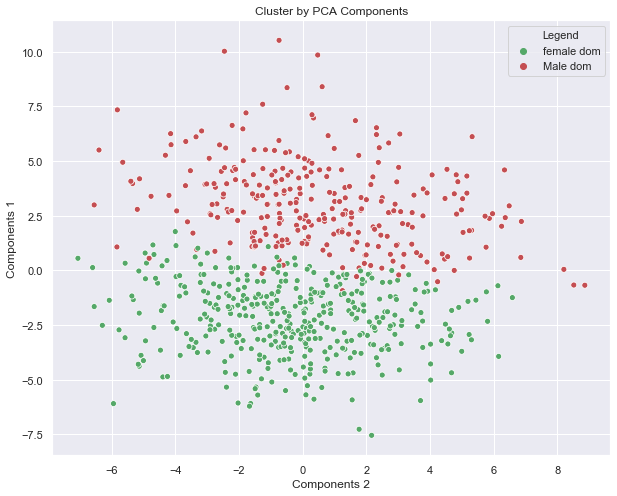

In [41]:
x_axis = df_segm_kmeans['Components 2']
y_axis = df_segm_kmeans['Components 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = df_segm_kmeans['Legend'], palette = ['g', 'r'])
plt.title('Cluster by PCA Components')
plt.show()

In [42]:
pickle.dump(scaler, open ('scaler.pickle', 'wb'))

In [43]:
pickle.dump(pca, open('pca.pickle','wb'))

In [44]:
pickle.dump(kmeans, open('kmeans.pickle','wb'))